In [1]:
# Imports
import pickle, io
from PIL import Image
import numpy as np
from IPython.display import display
pkl = "scrambled_puzzle_data.pkl"


In [2]:
# Load and list pieces with their detected correct_index
with open(pkl, "rb") as f:
    data = pickle.load(f)

# infer keys from first item
sample = data[0]
if isinstance(sample, dict):
    keys = list(sample.keys())
else:
    raise TypeError("Expected list of dicts in pickle")

# heuristics for key names
img_key = next((k for k in keys if any(x in k.lower() for x in ("img","image","data","tile"))), None)
idx_key = next((k for k in keys if any(x in k.lower() for x in ("correct_index","index","position","pos"))), None)
rot_key = next((k for k in keys if any(x in k.lower() for x in ("rot","rotate","rotation","angle"))), None)

print("Detected keys -> image:", img_key, " index:", idx_key, " rotation:", rot_key)
print("\nScrambled List index -> correct_position_index")
for i, item in enumerate(data):
    ci = item.get(idx_key, None) if isinstance(item, dict) else None
    print(f"{i:02d} -> {ci}")


Detected keys -> image: data  index: correct_index  rotation: applied_rotation_deg

Scrambled List index -> correct_position_index
00 -> 31
01 -> 46
02 -> 28
03 -> 48
04 -> 60
05 -> 55
06 -> 41
07 -> 37
08 -> 13
09 -> 14
10 -> 52
11 -> 77
12 -> 23
13 -> 16
14 -> 73
15 -> 75
16 -> 32
17 -> 70
18 -> 15
19 -> 8
20 -> 76
21 -> 69
22 -> 38
23 -> 19
24 -> 47
25 -> 64
26 -> 53
27 -> 1
28 -> 50
29 -> 51
30 -> 58
31 -> 57
32 -> 2
33 -> 18
34 -> 49
35 -> 25
36 -> 26
37 -> 62
38 -> 0
39 -> 80
40 -> 56
41 -> 68
42 -> 67
43 -> 5
44 -> 12
45 -> 10
46 -> 3
47 -> 6
48 -> 24
49 -> 78
50 -> 21
51 -> 11
52 -> 30
53 -> 34
54 -> 61
55 -> 20
56 -> 45
57 -> 72
58 -> 66
59 -> 17
60 -> 74
61 -> 7
62 -> 36
63 -> 44
64 -> 59
65 -> 33
66 -> 39
67 -> 27
68 -> 43
69 -> 63
70 -> 79
71 -> 22
72 -> 71
73 -> 40
74 -> 35
75 -> 65
76 -> 9
77 -> 4
78 -> 29
79 -> 54
80 -> 42


In [3]:
# Sort by correct_index and print the order
idx_key = "correct_index"
max_idx = max(item[idx_key] for item in data)
sorted_pieces = [None] * (max_idx + 1)

# Sort the items into the correct positions
for item in data:
    sorted_pieces[item[idx_key]] = item

# Print mapping: correct position -> scrambled index
print("After sorting: correct_position_index -> scrambled_list_index")
for new_idx, item in enumerate(sorted_pieces):
    # Find index manually by comparing correct_index fields instead of full objects
    for orig_idx, orig_item in enumerate(data):
        if orig_item[idx_key] == item[idx_key]:
            print(f"{new_idx:02d} -> {orig_idx:02d}")
            break


After sorting: correct_position_index -> scrambled_list_index
00 -> 38
01 -> 27
02 -> 32
03 -> 46
04 -> 77
05 -> 43
06 -> 47
07 -> 61
08 -> 19
09 -> 76
10 -> 45
11 -> 51
12 -> 44
13 -> 08
14 -> 09
15 -> 18
16 -> 13
17 -> 59
18 -> 33
19 -> 23
20 -> 55
21 -> 50
22 -> 71
23 -> 12
24 -> 48
25 -> 35
26 -> 36
27 -> 67
28 -> 02
29 -> 78
30 -> 52
31 -> 00
32 -> 16
33 -> 65
34 -> 53
35 -> 74
36 -> 62
37 -> 07
38 -> 22
39 -> 66
40 -> 73
41 -> 06
42 -> 80
43 -> 68
44 -> 63
45 -> 56
46 -> 01
47 -> 24
48 -> 03
49 -> 34
50 -> 28
51 -> 29
52 -> 10
53 -> 26
54 -> 79
55 -> 05
56 -> 40
57 -> 31
58 -> 30
59 -> 64
60 -> 04
61 -> 54
62 -> 37
63 -> 69
64 -> 25
65 -> 75
66 -> 58
67 -> 42
68 -> 41
69 -> 21
70 -> 17
71 -> 72
72 -> 57
73 -> 14
74 -> 60
75 -> 15
76 -> 20
77 -> 11
78 -> 49
79 -> 70
80 -> 39


In [4]:
# Show rotation applied for each piece in sorted order
def get_rot(it):
    return int(it.get(rot_key, 0)) if isinstance(it, dict) else 0

print("correct_position_index | applied_rotation_deg")
for i, item in enumerate(sorted_pieces):
    print(f"{i:02d} | {get_rot(item):3d}")


correct_position_index | applied_rotation_deg
00 |   0
01 |  90
02 | 270
03 |   0
04 |  90
05 | 270
06 |  90
07 |  90
08 |   0
09 |  90
10 | 180
11 | 270
12 |   0
13 |   0
14 | 180
15 | 180
16 |  90
17 | 180
18 | 270
19 | 180
20 | 180
21 | 270
22 |   0
23 |   0
24 |   0
25 | 180
26 |   0
27 | 180
28 | 180
29 | 270
30 |   0
31 | 180
32 |  90
33 |   0
34 | 270
35 | 270
36 | 180
37 | 180
38 | 180
39 |  90
40 |  90
41 | 270
42 | 270
43 | 180
44 | 180
45 |   0
46 |  90
47 | 270
48 |   0
49 |  90
50 |   0
51 | 270
52 |  90
53 |   0
54 |   0
55 | 270
56 | 180
57 | 270
58 |   0
59 |   0
60 |   0
61 |  90
62 |  90
63 | 180
64 |   0
65 | 270
66 | 180
67 | 180
68 | 180
69 |   0
70 |   0
71 | 180
72 | 270
73 | 180
74 | 270
75 | 270
76 | 180
77 |   0
78 | 270
79 | 270
80 | 180


In [5]:
# Convert & undo rotations (store corrected images in order)
def to_pil(x):
    if isinstance(x, Image.Image): return x.convert("RGB")
    if isinstance(x, np.ndarray): return Image.fromarray(x.astype("uint8")).convert("RGB")
    if isinstance(x, (bytes, bytearray)): return Image.open(io.BytesIO(x)).convert("RGB")
    if isinstance(x, dict):
        for k in ("img", "image", "data", "bytes"):
            if k in x: return to_pil(x[k])
    raise TypeError("Unknown image type")

corrected_imgs = []

# Print heading like in Cell 3
print("correct_position_index -> Final_rotation_after_correction")
for item in sorted_pieces:
    raw = item[img_key] if img_key in item else item
    img = to_pil(raw)
    applied = int(item.get(rot_key, 0))
    undo = (360 - (applied % 360)) % 360
    if undo:
        img = img.rotate(undo, expand=False)
    corrected_imgs.append(img)

    # Print corrected info
    print(f"{item[idx_key]:02d} -> {undo}°")


correct_position_index -> Final_rotation_after_correction
00 -> 0°
01 -> 270°
02 -> 90°
03 -> 0°
04 -> 270°
05 -> 90°
06 -> 270°
07 -> 270°
08 -> 0°
09 -> 270°
10 -> 180°
11 -> 90°
12 -> 0°
13 -> 0°
14 -> 180°
15 -> 180°
16 -> 270°
17 -> 180°
18 -> 90°
19 -> 180°
20 -> 180°
21 -> 90°
22 -> 0°
23 -> 0°
24 -> 0°
25 -> 180°
26 -> 0°
27 -> 180°
28 -> 180°
29 -> 90°
30 -> 0°
31 -> 180°
32 -> 270°
33 -> 0°
34 -> 90°
35 -> 90°
36 -> 180°
37 -> 180°
38 -> 180°
39 -> 270°
40 -> 270°
41 -> 90°
42 -> 90°
43 -> 180°
44 -> 180°
45 -> 0°
46 -> 270°
47 -> 90°
48 -> 0°
49 -> 270°
50 -> 0°
51 -> 90°
52 -> 270°
53 -> 0°
54 -> 0°
55 -> 90°
56 -> 180°
57 -> 90°
58 -> 0°
59 -> 0°
60 -> 0°
61 -> 270°
62 -> 270°
63 -> 180°
64 -> 0°
65 -> 90°
66 -> 180°
67 -> 180°
68 -> 180°
69 -> 0°
70 -> 0°
71 -> 180°
72 -> 90°
73 -> 180°
74 -> 90°
75 -> 90°
76 -> 180°
77 -> 0°
78 -> 90°
79 -> 90°
80 -> 180°


In [6]:
# Print index, grid location, and tile sizes
cols = 9
print("index | (row,col) | tile_size")
for idx, img in enumerate(corrected_imgs):
    r, c = divmod(idx, cols)
    print(f"{idx:02d} | ({r},{c}) | {img.size}")


index | (row,col) | tile_size
00 | (0,0) | (50, 50)
01 | (0,1) | (50, 50)
02 | (0,2) | (50, 50)
03 | (0,3) | (50, 50)
04 | (0,4) | (50, 50)
05 | (0,5) | (50, 50)
06 | (0,6) | (50, 50)
07 | (0,7) | (50, 50)
08 | (0,8) | (50, 50)
09 | (1,0) | (50, 50)
10 | (1,1) | (50, 50)
11 | (1,2) | (50, 50)
12 | (1,3) | (50, 50)
13 | (1,4) | (50, 50)
14 | (1,5) | (50, 50)
15 | (1,6) | (50, 50)
16 | (1,7) | (50, 50)
17 | (1,8) | (50, 50)
18 | (2,0) | (50, 50)
19 | (2,1) | (50, 50)
20 | (2,2) | (50, 50)
21 | (2,3) | (50, 50)
22 | (2,4) | (50, 50)
23 | (2,5) | (50, 50)
24 | (2,6) | (50, 50)
25 | (2,7) | (50, 50)
26 | (2,8) | (50, 50)
27 | (3,0) | (50, 50)
28 | (3,1) | (50, 50)
29 | (3,2) | (50, 50)
30 | (3,3) | (50, 50)
31 | (3,4) | (50, 50)
32 | (3,5) | (50, 50)
33 | (3,6) | (50, 50)
34 | (3,7) | (50, 50)
35 | (3,8) | (50, 50)
36 | (4,0) | (50, 50)
37 | (4,1) | (50, 50)
38 | (4,2) | (50, 50)
39 | (4,3) | (50, 50)
40 | (4,4) | (50, 50)
41 | (4,5) | (50, 50)
42 | (4,6) | (50, 50)
43 | (4,7) | (50, 50)
44

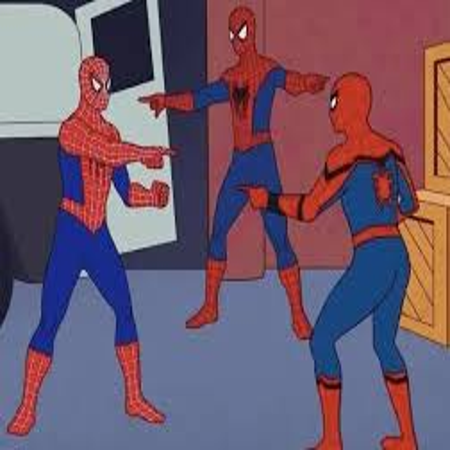

Voila Complete


In [7]:
# Reconstruct, display, save
tw, th = corrected_imgs[0].size
rows = (len(corrected_imgs) // cols)
full = Image.new("RGB", (tw*cols, th*rows))
for idx, img in enumerate(corrected_imgs):
    r, c = divmod(idx, cols)
    full.paste(img, (c*tw, r*th))
display(full)
full.save("unscrambled_puzzle.png")
print("Voila Complete")
